<a href="https://colab.research.google.com/github/PranjalMinocha/JPLasteroid/blob/main/Week%203/Aryan_Shukla_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting drive for dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV file

In [3]:
df = pd.read_csv("/content/drive/MyDrive/input/Asteroid_Updated.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Taking Sample from dataframe

In [4]:
df.sample(5)

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
714607,NaN,2.325579,0.245613,3.322410,110.734200,218.347430,1.754388,2.896771,3.546541,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,MBA,0.277912,1295.374075,110.817670
424522,NaN,2.318477,0.110729,24.011109,334.049814,131.210931,2.061754,2.575201,3.530307,6134.0,...,NaN,NaN,NaN,NaN,NaN,1.119950,MBA,0.279190,1289.444774,91.943802
706071,NaN,2.261632,0.125673,4.679999,12.661896,177.361266,1.977406,2.545859,3.401271,1022.0,...,NaN,NaN,NaN,NaN,NaN,0.977990,MBA,0.289782,1242.314081,196.406012
384323,NaN,2.417148,0.185791,1.993829,213.114681,188.991664,1.968063,2.866233,3.758055,5493.0,...,NaN,NaN,NaN,NaN,NaN,0.976045,MBA,0.262270,1372.629558,181.724526
538852,NaN,3.151252,0.071986,7.698773,228.573225,67.335153,2.924406,3.378098,5.594134,4964.0,...,NaN,NaN,NaN,NaN,NaN,1.919170,MBA,0.176189,2043.257431,114.756593


### Details of Some Columns
- name- Name of asteroids
- a - Semi major axis
- e - eccentricity
- i - inclination with respect to x-y elliptical plane
- om - longitude of the ascending node
- w - argument of perihelion
- q - perihelion distance
- ad - aphelion distance
- per_y - orbital period
- data_Arc - data arc span(d)
- condition_Code = orbit condition code
- n_obs_used - number of observation used
- H - absolute magnitude parameter
- neo-Near earth object
- pha - Physically hazardous object
- diameter - diameter of asteroids
- extent - Object bi/tri axial ellipsoid dimensions(Km)
- albedo - geometric albedo
- rot_per - rotation period

In [5]:
print("variables in dataset are",list(df.columns))
print("No. of variables are", df.shape[1])

variables in dataset are ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']
No. of variables are 31


### There are entries with null diameters

In [6]:
# for an instance 
df[df['diameter'].isnull()].head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
681,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
698,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
729,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065
842,Nicolaia,2.279598,0.209766,7.997715,4.071354,316.957209,1.801415,2.757780,3.441878,37651.0,...,NaN,NaN,NaN,NaN,NaN,0.798230,MBA,0.286363,1257.146084,317.982712


In [7]:
print("Entries with null diameter are :", df['diameter'].isnull().sum())
print("Entries with not null diameter are :", df['diameter'].notnull().sum())

Entries with null diameter are : 702078
Entries with not null diameter are : 137636


- __Cleaning__:
<br/> 
__Problem__: 'diameter' is string type, I will convert to numeric. This gave errors for some diameters because they were corrupted, so I added the argument "errors='coerce'" to set corrupted diameters to nan, and later dropped those.
<br/> 
Dropping irrelevent features and choosing my battles:
<br/> 
dropping names because I dont believe asteroids are useful feature.
<br/> 
Dropping all features with more than half nan values
<br/> 
dropping condition_code and neo and pha because most seems to be 0 or nan.
<br/> 
Replace nans entries with mean value of column

In [8]:
df['diameter']=pd.to_numeric(df['diameter'],errors='coerce') #transforming to numeric, setting errors to NaN
dropindexes = df['diameter'][df['diameter'].isnull()].index #rows with nan diameters to drop
dropped_df = df.loc[dropindexes] #saving dropped rows for the future
df=df[df['diameter'].notnull()]

In [9]:
# after dropping the NaN val
print(df.shape)

(137635, 31)


In [10]:
print("variables in dataset are",list(df.columns))
print("No. of variables are", df.shape[1])

variables in dataset are ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']
No. of variables are 31


In [11]:
tooMuchNa = df.columns[df.isna().sum()/df.shape[0] > 0.5]
df = df.drop(tooMuchNa,axis=1)
df = df.drop(['condition_code'],axis=1)
df = df.drop(['neo','pha'],axis=1)

In [12]:
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [13]:
df.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,diameter,albedo,moid,class,n,per,ma
18163,3.035256,0.089026,9.395812,7.010245,323.523149,2.765039,3.305472,5.288118,9548.0,1436,13.3,8.182,0.152000,1.76101,MBA,0.186385,1931.484962,189.820429
273185,3.095061,0.042329,9.370139,206.482584,258.740375,2.964050,3.226071,5.445176,5791.0,138,16.2,3.718,0.051000,1.99949,MBA,0.181009,1988.850618,262.410245
22478,2.727907,0.203809,13.245106,11.959928,290.000555,2.171936,3.283878,4.505599,8093.0,978,13.9,4.738,0.261000,1.19866,MBA,0.218756,1645.670021,236.934004
779060,3.183287,0.222128,25.934633,320.220265,232.794709,2.476190,3.890385,5.679655,3508.0,59,16.0,3.189,0.130066,1.55605,MBA,0.173536,2074.494069,157.202611
103245,2.688428,0.125601,3.776864,191.899237,265.930991,2.350759,3.026096,4.408143,9062.0,531,15.6,4.564,0.059000,1.37135,MBA,0.223592,1610.074359,147.569371


In [14]:
df = df.drop(['albedo','H','class'],axis = 1)

In [15]:
df.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,diameter,moid,n,per,ma
54169,2.359808,0.170026,2.931582,169.828205,325.397408,1.958580,2.761036,3.625126,7675.0,861,1.682,0.973728,0.271887,1324.077257,152.863157
345494,2.578152,0.034384,13.463175,75.971873,124.603027,2.489506,2.666799,4.139721,4822.0,177,2.947,1.498590,0.238090,1512.032949,76.510161
44287,2.978201,0.107449,10.374945,212.450426,160.681229,2.658195,3.298207,5.139716,7743.0,867,4.287,1.661220,0.191767,1877.281425,342.627909
159383,2.685310,0.117947,13.146912,200.760856,2.788088,2.368587,3.002033,4.400477,7585.0,307,2.787,1.365710,0.223982,1607.274192,296.003549
208400,2.802324,0.149778,6.779936,29.797508,241.700880,2.382598,3.222050,4.691219,6574.0,327,3.685,1.375440,0.210100,1713.467787,344.192530


In [16]:
# As discussed in meet some features are in form e^x so taking log to find trend in diameter
df['diameter']= df['diameter'].apply(np.log)
for column in df.columns.drop(['diameter']):
    if(column != "class"):
      df['log('+column+')']=df[column].apply(np.log)
df = df.dropna(axis=1)


In [17]:
df.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,log(w),log(q),log(ad),log(per_y),log(data_arc),log(n_obs_used),log(moid),log(n),log(per),log(ma)
94115,3.083777,0.116858,15.363279,126.299963,334.652511,2.723412,3.444142,5.415426,8677.0,657,...,5.813093,1.001885,1.236675,1.689251,9.068431,6.487684,0.558386,-1.703730,7.589834,4.919362
9125,2.538276,0.154777,1.865331,179.180369,255.854047,2.145409,2.931143,4.044050,14230.0,1245,...,5.544607,0.763330,1.075393,1.397247,9.563108,7.126891,0.149471,-1.411725,7.297829,5.179789
378396,3.120364,0.138946,5.278418,191.942928,224.507520,2.686803,3.553925,5.512087,4073.0,125,...,5.413909,0.988352,1.268053,1.706943,8.312135,4.828314,0.531328,-1.721421,7.607525,0.317382
226499,3.137838,0.155482,4.057299,327.209146,354.645122,2.649959,3.625716,5.558452,5818.0,303,...,5.871118,0.974544,1.288052,1.715320,8.668712,5.713733,0.492603,-1.729798,7.615902,5.776548
50989,3.063721,0.081462,13.000912,85.120639,68.543734,2.814144,3.313297,5.362681,7623.0,830,...,4.227472,1.034658,1.197944,1.679464,8.938925,6.721426,0.619565,-1.693942,7.580046,5.488248


In [18]:
print("variables in dataset are",list(df.columns))
print("No. of variables are", df.shape[1])

variables in dataset are ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'diameter', 'moid', 'n', 'per', 'ma', 'log(a)', 'log(e)', 'log(i)', 'log(om)', 'log(w)', 'log(q)', 'log(ad)', 'log(per_y)', 'log(data_arc)', 'log(n_obs_used)', 'log(moid)', 'log(n)', 'log(per)', 'log(ma)']
No. of variables are 29


### Correlation analysis

In [19]:
df.corr()['diameter'].abs().sort_values(ascending=False)

diameter           1.000000
log(a)             0.563616
log(per_y)         0.563616
log(n)             0.563616
log(per)           0.563616
log(q)             0.543737
log(moid)          0.528689
n                  0.525392
q                  0.522404
moid               0.521095
data_arc           0.519390
n_obs_used         0.511250
log(ad)            0.477252
log(n_obs_used)    0.433656
log(data_arc)      0.298793
a                  0.195634
e                  0.185047
log(e)             0.157921
ad                 0.112606
i                  0.096037
log(i)             0.088749
per                0.046649
per_y              0.046649
ma                 0.030946
log(ma)            0.023154
log(w)             0.006008
w                  0.005310
om                 0.001478
log(om)            0.000169
Name: diameter, dtype: float64

### Splitting

In [20]:
from sklearn.model_selection import train_test_split
predictors = df.drop('diameter',axis=1) 
target = df['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [21]:
X_train.sample(5)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,log(w),log(q),log(ad),log(per_y),log(data_arc),log(n_obs_used),log(moid),log(n),log(per),log(ma)
71511,2.781774,0.172652,7.097655,300.216462,171.863035,2.301495,3.262054,4.639713,7515.0,892,...,5.146698,0.833559,1.182357,1.534652,8.924656,6.793466,0.276540,-1.549130,7.435234,4.385983
183259,2.542647,0.233885,12.645934,20.849117,111.668463,1.947960,3.137334,4.054500,7355.0,581,...,4.715534,0.666783,1.143373,1.399827,8.903136,6.364751,0.000910,-1.414305,7.300409,5.762602
245179,3.425417,0.074888,8.649209,303.327993,166.263039,3.168893,3.681941,6.339842,5729.0,334,...,5.113571,1.153382,1.303440,1.846854,8.653296,5.811141,0.782334,-1.861332,7.747436,3.674754
51226,3.018619,0.032920,13.802157,10.433713,295.918112,2.919247,3.117990,5.244699,7368.0,940,...,5.690083,1.071326,1.137189,1.657218,8.904902,6.845880,0.659585,-1.671696,7.557800,4.939943
45409,3.018806,0.089000,9.122823,287.396345,154.238692,2.750133,3.287480,5.245188,8115.0,1462,...,5.038501,1.011649,1.190121,1.657311,9.001469,7.287561,0.570686,-1.671789,7.557893,5.694314


### Normalization

In [22]:
from sklearn import preprocessing

#Input standard normalization:
std_scaler = preprocessing.StandardScaler().fit(X_train)

def scaler(X):
    x_norm_arr= std_scaler.fit_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

X_train_norm = scaler(X_train)
X_test_norm = scaler(X_test)

def inverse_scaler(X):
    x_norm_arr= std_scaler.inverse_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

### Trying Linear Regression

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
#Defining the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

###Training
lr.fit(X_train,Y_train)

###Predicting
Y_pred_lr = lr.predict(X_test)

###Scoring
score_lr = r2_score(Y_test,Y_pred_lr)
print("R^2 value for the regression  :",  round(score_lr,3))
rms = mean_squared_error(Y_test, Y_pred_lr, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.753
rms value for the regression  : 0.321


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


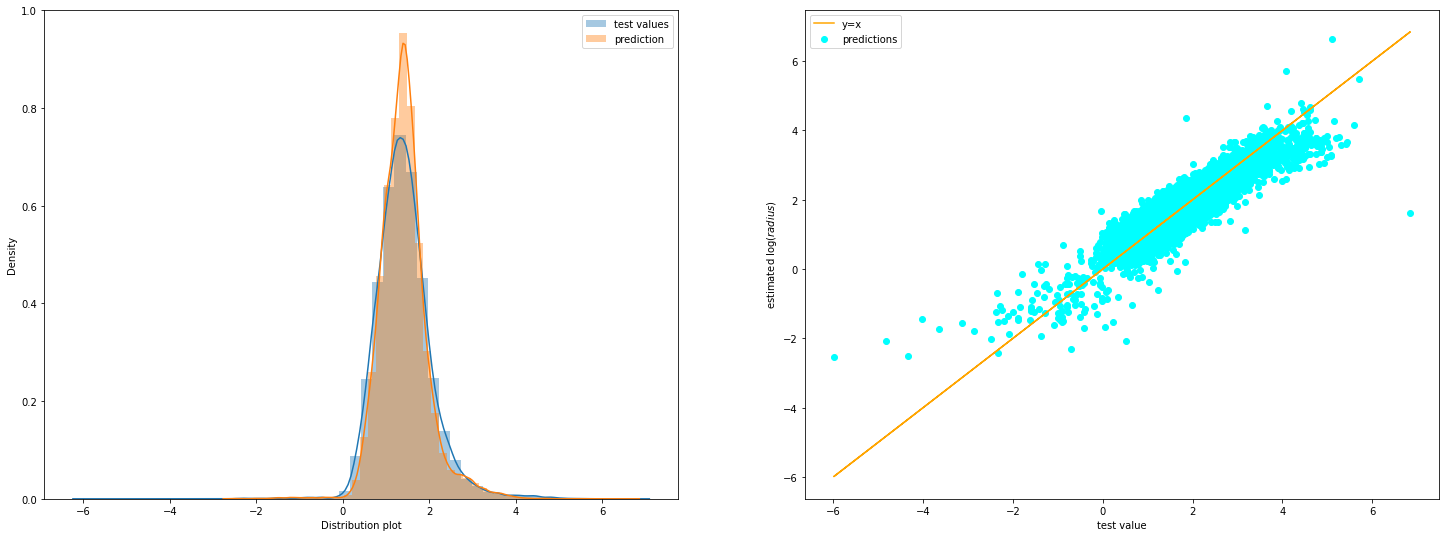

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_lr ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_lr, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Trying XGBoost

In [25]:
import xgboost as xgb 
xgReg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, 
                         learning_rate = 0.08 ,
                max_depth = 4, n_estimators = 500)

### Training
xgReg.fit(X_train_norm,Y_train)

### Predicting
Y_pred_xgb = xgReg.predict(X_test_norm)

### Scoring
score_xgb = r2_score(Y_test,Y_pred_xgb)
print("R^2 value for the regression  :",  round(score_xgb,3))
rms = mean_squared_error(Y_test, Y_pred_xgb, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.63
rms value for the regression  : 0.393


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


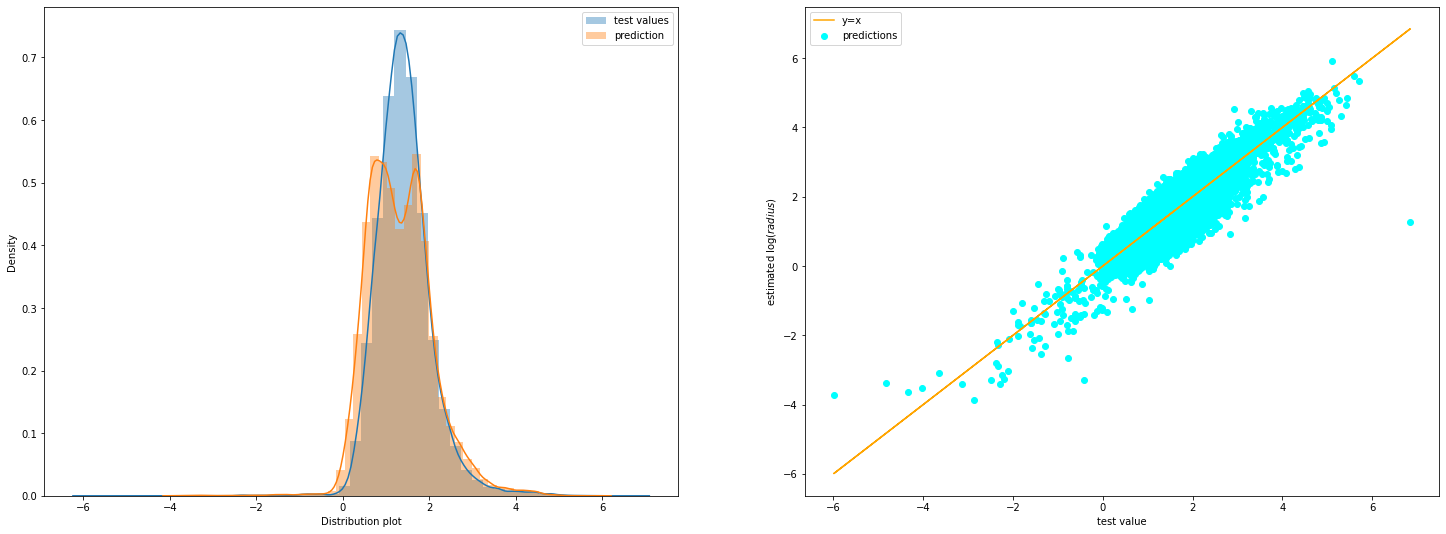

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_xgb ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_xgb, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### SVM

In [27]:
from sklearn import svm
svmreg = svm.SVR()

### Training
svmreg.fit(X_train_norm,np.ravel(Y_train))

### Predicting
Y_pred_svm = svmreg.predict(X_test_norm)
### Scoring
score_svm = r2_score(Y_test,Y_pred_svm)
print("R^2 value for the regression  :",  round(score_svm,3))
rms = mean_squared_error(Y_test, Y_pred_svm, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.768
rms value for the regression  : 0.311


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


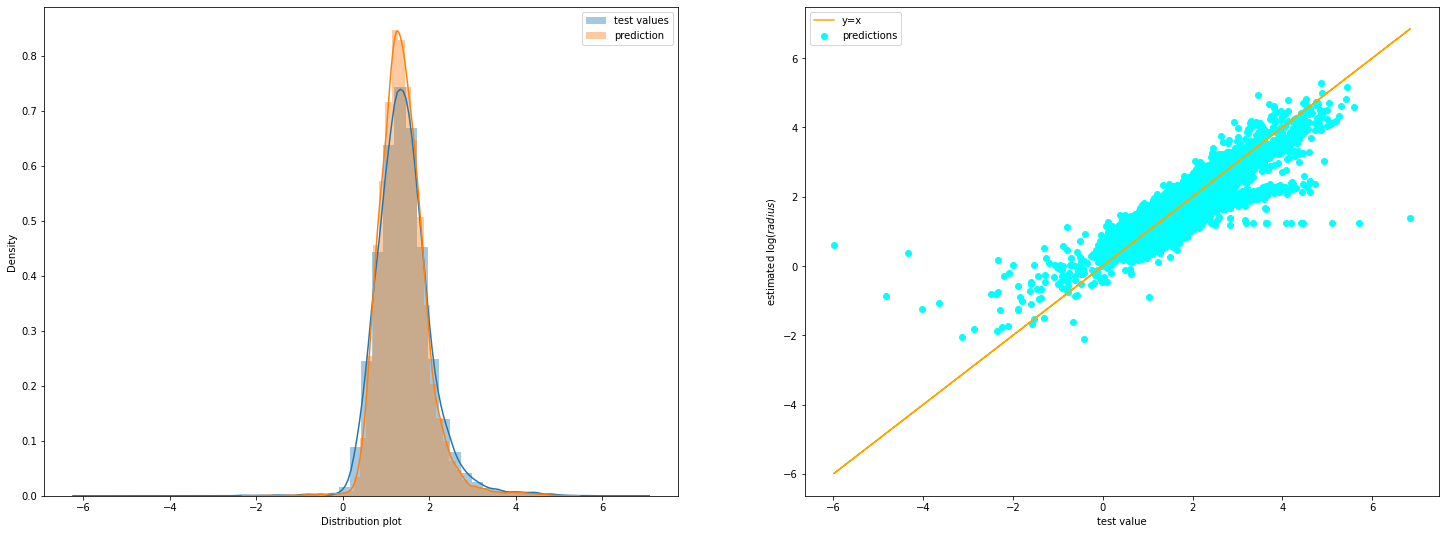

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_svm ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_svm, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()

### Light GBM

In [30]:
import lightgbm as lgb

LGBReg = lgb.LGBMRegressor()

### Training
LGBReg.fit(X_train,Y_train)

### Predicting
Y_pred_lgb = LGBReg.predict(X_test_norm)
### Scoring
score_lgb = r2_score(Y_test,Y_pred_svm)
print("R^2 value for the regression  :",  round(score_svm,3))
rms = mean_squared_error(Y_test, Y_pred_svm, squared=False)
print("rms value for the regression  :",  round(rms,3))

R^2 value for the regression  : 0.768
rms value for the regression  : 0.311


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


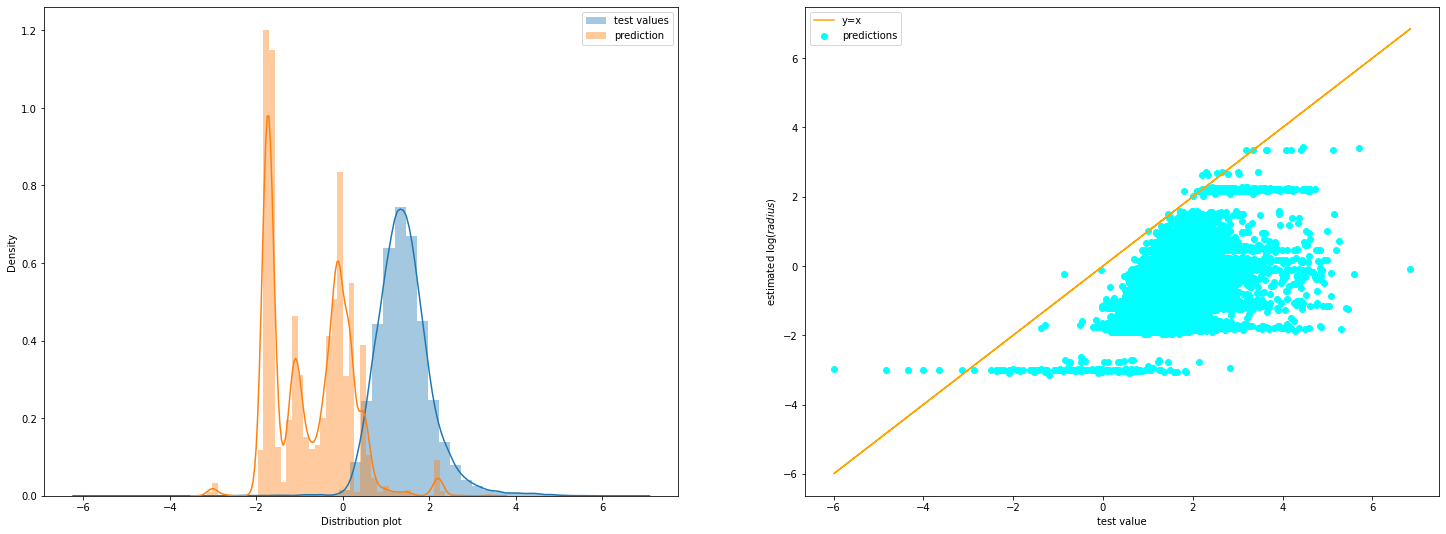

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25,9)) 
sns.distplot(Y_test.values,label='test values', ax=ax1)
sns.distplot(Y_pred_lgb ,label='prediction', ax=ax1)
ax1.set_xlabel('Distribution plot')
ax2.scatter(Y_test,Y_pred_lgb, c='cyan',label='predictions')
ax2.plot(Y_test,Y_test,c='orange',label='y=x')
ax2.set_xlabel('test value')
ax2.set_ylabel('estimated $\log(radius)$')
ax1.legend()
ax2.legend()